# GRADIENT DESCENT AND COST FUNCTION ON LINEAR REGRESSION

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
data = pd.read_csv('Linear-regression.csv')

In [92]:
data = data.dropna()

In [93]:
data.head()

X         Y
0  1  3.888889
1  2  4.555556
2  3  5.222222
3  4  5.888889
4  5  6.555556

In [94]:
data.describe

<bound method NDFrame.describe of        X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]>

In [95]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1, 1)

In [96]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [97]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size=0.3, random_state=0)

In [99]:
theta = np.random.randn(X_train.shape[1], 1)

In [100]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

In [101]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [102]:
alpha = 0.01
iterations = 1000

In [103]:
theta_final, cost_history = gradient_descent(X_train, Y_train, theta, alpha, iterations)

In [104]:
Y_pred = X_test.dot(theta_final)

In [105]:
if np.isnan(Y_pred).any():
    print("Error: NaN values detected in Y_pred")

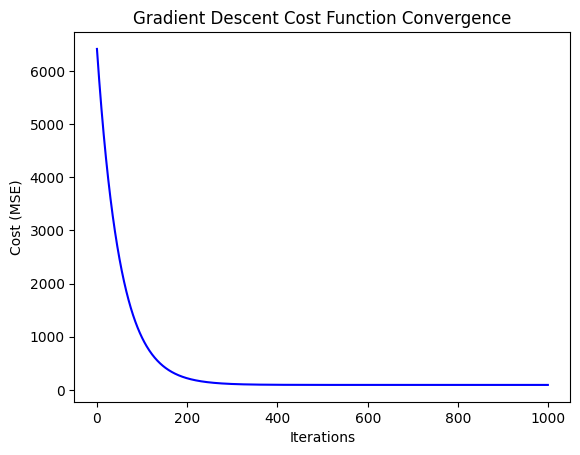

In [106]:
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function Convergence")
plt.show()

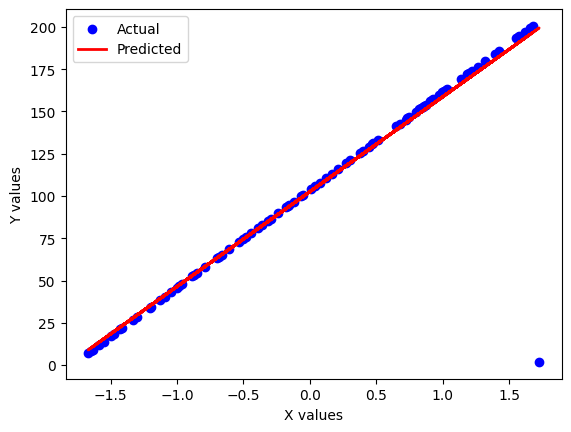

In [107]:
plt.scatter(X_test[:, 1], Y_test, color='blue', label='Actual')
plt.plot(X_test[:, 1], Y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [108]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [109]:
print(f"Final theta values:\n{theta_final}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Final theta values:
[[102.54546619]
 [ 56.07941481]]
Mean Squared Error: 437.0143896534039
R² Score: 0.8657588463246023


# GRADIENT DESCENT AND COST FUNCTION ON MULTILINEAR REGRESSION

In [232]:
data = pd.read_csv('50_Startups.csv')

In [248]:
print("Missing values in the dataset:\n", data.isnull().sum())

Missing values in the dataset:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [249]:
print("\nStandard deviation of features:\n", data[['R&D Spend', 'Administration', 'Marketing Spend']].std())


Standard deviation of features:
 R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
dtype: float64


In [250]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend']].values
y = data['Profit'].values

In [251]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

In [252]:
if np.any(X_std == 0):
    print("\nWarning: One or more features have zero standard deviation. Adjusting...")
    X_std[X_std == 0] = 1

X = (X - X_mean) / X_std

In [253]:
X = np.c_[np.ones(X.shape[0]), X]

In [254]:
theta = np.zeros(X.shape[1])

In [255]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

In [256]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [269]:
alpha = 0.01
iterations = 1000

In [270]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)


In [271]:
print("Optimized parameters (theta):", theta)
print("Final cost:", compute_cost(X, y, theta))

Optimized parameters (theta): [112012.63912324  36469.41967538   -693.40316636   3432.21831613]
Final cost: 39213254.79808789


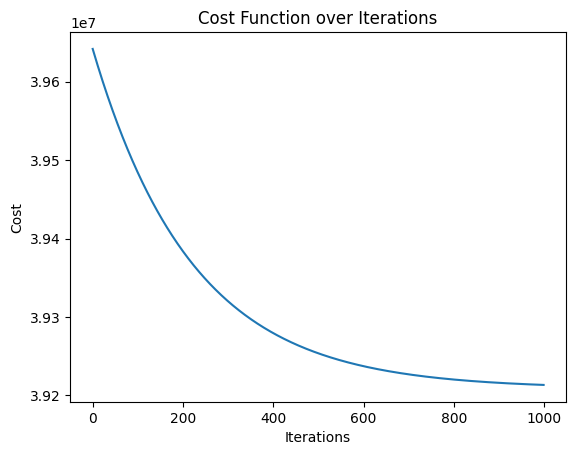

In [272]:
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [273]:
y_pred = X.dot(theta)

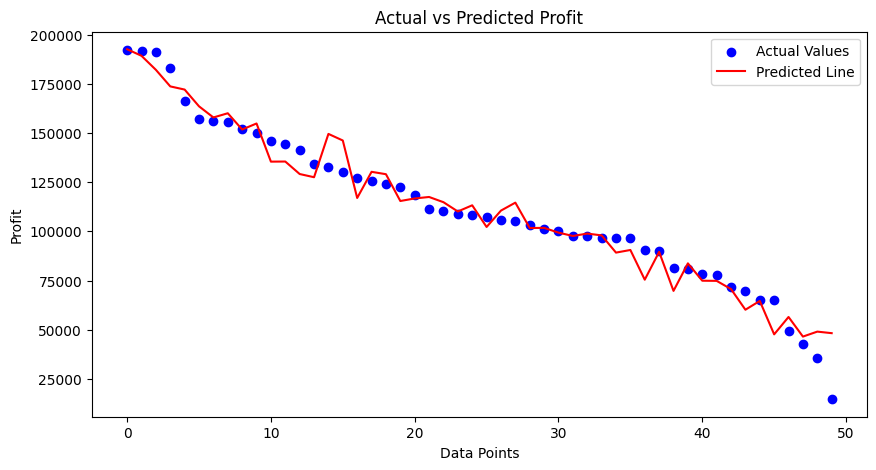

In [276]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y)), y, color='blue', label='Actual Values')
plt.plot(range(len(y)), y_pred, color='red', label='Predicted Line')
plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()
plt.show()